## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset of house information in Ames, Iowa, predicting sale price.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/houseprices.csv')
print(house.shape)
house.head()

(1460, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check for nulls. Remove any columns with more than 100 nulls, then drop any remaining rows with nulls after that.

In [3]:
# your work here

house.isnull().sum().sort_values(ascending=False).head(7)



poolqc         1453
miscfeature    1406
alley          1369
fence          1179
fireplacequ     690
lotfrontage     259
garagecond       81
dtype: int64

In [4]:
cols_to_drop = house.isnull().sum().sort_values(ascending=False).head(6).index
house.drop(columns=cols_to_drop, inplace=True)
house.isnull().sum().sort_values(ascending=False).head(7)

garagetype      81
garageyrblt     81
garagefinish    81
garagecond      81
garagequal      81
bsmtexposure    38
bsmtfintype2    38
dtype: int64

In [5]:
house.dropna(inplace=True)
house.isnull().sum().sort_values(ascending=False).head(7)

saleprice       0
yearremodadd    0
roofmatl        0
exterior1st     0
exterior2nd     0
masvnrtype      0
masvnrarea      0
dtype: int64

One hot encode your categorical features using get_dummies.

In [6]:
# your work here
house.drop('id', axis=1, inplace=True)

y = house.saleprice
X = pd.get_dummies(house.drop('saleprice', axis=1))

Take a look at your outcome variable. It is highly skewed, and has a few very rare large outliers.

Let's try log transforming the y variable.

<AxesSubplot:>

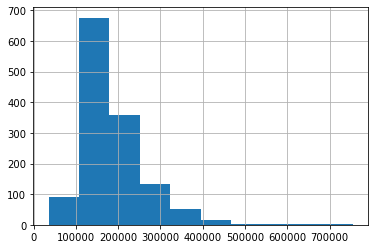

In [7]:
# your work here
y.hist()

In [8]:
y_log = np.log(y)

In [9]:
y_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: saleprice, Length: 1338, dtype: float64

We know that there are some rare large values. We can make sure that the training and test sets have about the same distribution by stratifying the train-test split.

Split your training and test sets, with a test size of 0.2. Use the given helper function to stratify the continuous outcome. Remember that the outcome variable is now the **log of sale price**.

In [10]:
def binned(y, num_bins):
    # Creates an object to put in the stratify keyword in train_test_split
    # Specify number of bins to separate your y variable
    ymin, ymax = y.min(), y.max()
    bins = np.linspace(ymin, ymax, num_bins+1)[:-1]
    y_binned = np.digitize(y, bins)
    return y_binned

In [11]:
# your work here

y_binned = binned(y_log, 10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, stratify=y_binned)


Create a Gradient Boosting Regressor model. Measure the MAE (Mean Absolute Error) for the training and testing sets.

In [12]:
# your work here
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

gbr_train_pred = gbr.predict(X_train)
gbr_test_pred = gbr.predict(X_test)

print(
    f'Train MAE: {mean_absolute_error(y_train, gbr_train_pred)}\n'
    f'Test MAE: {mean_absolute_error(y_test, gbr_test_pred)}\n'
)

Train MAE: 0.05281581291389673
Test MAE: 0.09313103654130164



Create a grid search. Try varying subsample, learning rate, and max features. Use MAE as your scoring metric.

In [30]:
# your work here

gbr2 = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)

from sklearn.model_selection import GridSearchCV
grid_params = {
    'subsample':[0.25, 0.5, 0.75, 0.9],
    'learning_rate':np.logspace(-3, 0, 4), 
    'max_features':[0.75, 0.9, 1.0]
}

grid = GridSearchCV(gbr2, grid_params, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000,
                                                 n_iter_...
                            

Create residual plots of the training and test sets and interpret your results.

subsample: 0.5
learning_rate: 0.1
max_features: 0.9
train nMAE: -0.06326054939243907
test nMAE: -0.09363879631543745



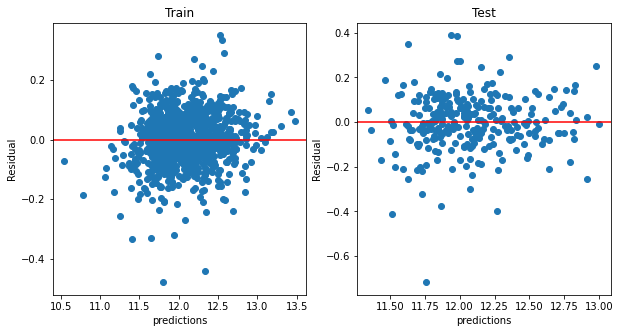

In [31]:
# your work here

train_pred = grid.predict(X_train)
test_pred = grid.predict(X_test)

print(
    f'subsample: {grid.best_estimator_.subsample}\n'
    f'learning_rate: {grid.best_estimator_.learning_rate}\n'
    f'max_features: {grid.best_estimator_.max_features}\n'
    f'train nMAE: {grid.score(X_train, y_train)}\n'
    f'test nMAE: {grid.score(X_test, y_test)}\n'
)

res_train = y_train - train_pred
res_test = y_test - test_pred

plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.scatter(train_pred, res_train)
plt.axhline(color='r')
plt.xlabel('predictions')
plt.ylabel('Residual')
plt.title('Train')

plt.subplot(1,2,2)
plt.scatter(test_pred, res_test)
plt.axhline(color='r')
plt.xlabel('predictions')
plt.ylabel('Residual')
plt.title('Test')
plt.show()


In [ ]:
# The model is overfitting after the grid search but the errors are still fairly low for the
# test set. The resudual plots show the errors are about the same across the prediction range.